<a href="https://colab.research.google.com/github/DestonSJU/IDS/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 and 2. First I import and read the wine_flag_all.csv file. I then use it to create the dataframe wineDF and display it.

In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import csv file
from google.colab import files
Upload = files.upload()

Saving wine_flag_all.csv to wine_flag_all.csv


In [3]:
#Creates dataframe using the data
wineDF = pd.read_csv("wine_flag_all.csv")
wineDF.head(65)

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
60,Red,Low,High
61,Red,Low,High
62,Red,High,Low
63,Red,Low,Low


3. After creating the dataframe I check to see if there are any missing values. I found that there are no missing values in the data

In [4]:
#Checks for missing values
wineDF.isnull().sum()

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

4. I create a new dataframe encoded_wineDF and then loop through the orginal dataframe to add all of the label encoded data into the new dataframe. For type, 0 represents red wine while 1 represent white wine. For Alcohol_flag, 0 represents high alcohol content and 1 represents low alcohol content. Finally for Sugar_flag, 0 represent high sugar content while 1 represents low sugar content.

In [5]:
#Creates a new dataframe and loops through and puts the encoded wine data into it
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

encoded_wineDF = pd.DataFrame()


for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])

print(encoded_wineDF)

      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


5 and 6. I first create and plot the contigency table for Type and Alcohol_flag. After that I create and plot the contigency table for Type and Sugar_content. I analyze the results to see if I can draw any conclusions. One thing that I notice with both tables is that the majority of the wine in this dataset is white (67.6%). While I couldn't make any more conclusions with the Type and Alcohol content contigency table, there are some conclusions that I can draw for the Type and Sugar content contingency table. One thing that I notice is that for red wine the majority of their sugar content is low (78.2%), while for white wine the majority of their sugar content is high (61.2%).

In [6]:
#Creates and displays contingency table for Type and Alcohol content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag, margins=True)
two_way_table

Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


In [7]:
#Creates and displays contingency table for Type and Alcohol content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag, normalize = 'all', margins=True)
two_way_table

Alcohol_flag,High,Low,All
Type,,,
Red,0.144993,0.179372,0.324365
White,0.351570,0.324066,0.675635
All,0.496562,0.503438,1.000000


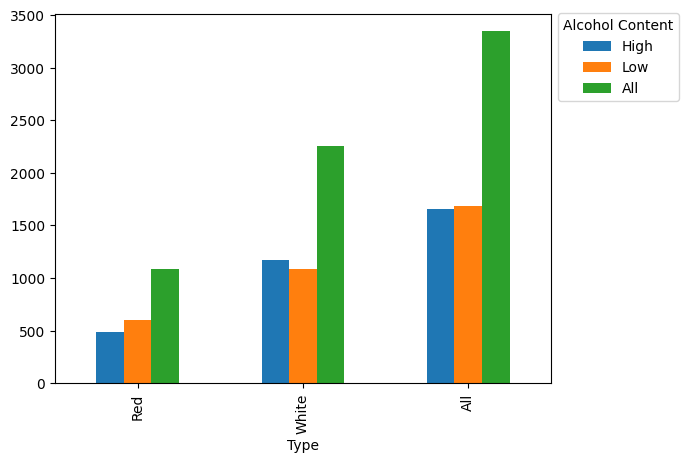

In [8]:
#Plots the contingency table for Type and Alcohol content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Alcohol_flag, margins=True)
ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Alcohol Content', bbox_to_anchor=(1, 1.02), loc='upper left')

In [9]:
#Creates and displays contingency table for Type and Sugar content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Sugar_flag, margins=True)
two_way_table

Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


In [10]:
#Creates and displays contingency table for Type and Sugar content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Sugar_flag, normalize = 'all', margins=True)
two_way_table

Sugar_flag,High,Low,All
Type,,,
Red,0.070852,0.253513,0.324365
White,0.413154,0.262481,0.675635
All,0.484006,0.515994,1.000000


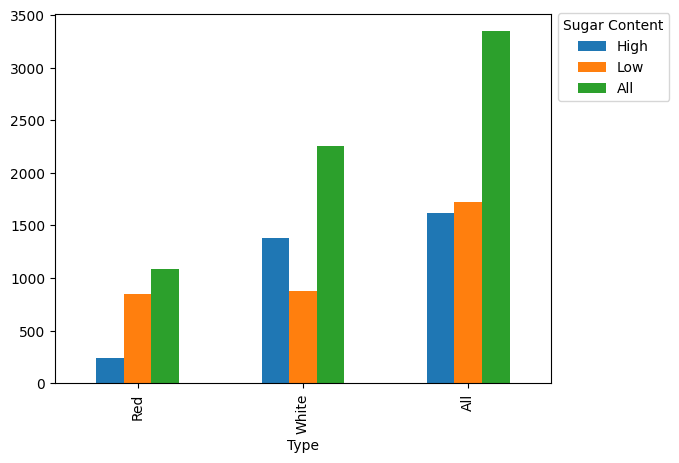

In [11]:
#Plots the contingency table for Type and Sugar content
two_way_table = pd.crosstab(wineDF.Type, wineDF.Sugar_flag, margins=True)
ax = two_way_table.plot(kind="bar", stacked=False)
ax.legend(title='Sugar Content', bbox_to_anchor=(1, 1.02), loc='upper left')

7. I used the contigency tables to find the probabilities for each of the three attributes. These are the findings:

  p(Red) = 1085/3345 = 0.324 = 32.4%

  p(White) = 2260/3345 = 0.676 = 67.6%

  p(Alcohol_High) = 1661/3345 = 0.497 = 49.7%

  p(Alcohol_Low) = 1684/3345 = 0.503 = 50.3%

  p(Sugar_High) = 1619/3345 = 0.484 = 48.4%

  p(Sugar_Low) = 1726/3345 = 0.516 = 51.6%

  After finding the initial probability for the three attributes I then used the tables and Bayes' Theorem in order to find the conditional probabilites for Alcohol and Sugar content whenever the type of wine is red. This is what I found:

  p(Alcohol_High|Red) = p(Red|Alcohol_High) * p(Alcohol_High) / p(Red) = (485/1661) * 0.497 / 0.324 = 0.447 = 44.7%

  p(Alcohol_Low|Red) = p(Red|Alcohol_Low) * p(Alcohol_Low) / p(Red) = (600/1684) * 0.503 / 0.324 = 0.553 = 55.3%

  p(Sugar_High|Red) = p(Red|Sugar_High) * p(Sugar_High) / p(Red) = (237/1619) * 0.484 / 0.324 = 0.218 = 21.8%

  p(Sugar_Low|Red) = p(Red|Sugar_Low) * p(Sugar_Low) / p(Red) = (848/1726) * 0.516 / 0.324 = 0.782 = 78.2%

  I also verified these values using the contigency tables and found that the values were the same:

  p(Alcohol_High|Red) = 485/1085 = 0.447 = 44.7%

  p(Alcohol_Low|Red) = 600/1085 = 0.553 = 55.3%

  p(Sugar_High|Red) = 237/1085 = 0.218 = 21.8%

  p(Sugar_High|Red) = 848/1085 = 0.782 = 78.2%

In [12]:
#Values for the probabilities of each attribute
pRed = 1085/3345
pWhite = 2260/3345
pAHigh = 1661/3345
pALow = 1684/3345
pSHigh = 1619/3345
pSLow = 1726/3345

#Using Bayes' Theorem to find and print the conditional probablities
pAHighRed = (485/1661) * pAHigh / pRed
pALowRed = (600/1684) * pALow / pRed
pSHighRed = (237/1619) * pSHigh / pRed
pSLowRed = (848/1726) * pSLow / pRed

print("p(Alcohol_High|Red) = ", pAHighRed)
print("p(Alcohol_Low|Red) = ", pALowRed)
print("p(Sugar_High|Red) = ", pSHighRed)
print("p(Sugar_Low|Red) = ", pSLowRed)

p(Alcohol_High|Red) =  0.44700460829493094
p(Alcohol_Low|Red) =  0.5529953917050691
p(Sugar_High|Red) =  0.21843317972350232
p(Sugar_Low|Red) =  0.7815668202764977


8. and 9. First I create the NBmodel by using the encoded wineDF dataframe that I created before. I make sure to stratify and shuffle the data and use 63 as the random_state. After that I calculate the accuracy of the model for both the training and test data and then display it. After doing this with different sizes for the training and test data these are my results for the different training and testing data accuracys for each ratio:
    
    Ratio Train Test

    80-20 0.726 0.752

    75-25 0.727 0.746

    70-30 0.728 0.739

    60-40 0.726 0.740

    50-50 0.725 0.738

 Overall, based on my results, the accuracy of the training and testing using different ratios doesn't change that much. While the training data accuracy fluctuates by about .002 up and down as the ratio changes, for the testing data, in general, the accuracy goes down as the training data becomes smaller (goes down about 0.014).


In [13]:
#Creates the NB model and prints out the encoded training and testing data
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

NBmodel = GaussianNB()

X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

#The dataframe shuffled, stratified and is split into training and testing data (80-20 ratio)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=63, shuffle=True, test_size=0.2, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2930             0           0
1531             0           1
2692             0           1
1411             0           1
658              0           1
...            ...         ...
171              1           0
305              0           1
3237             0           1
60               1           0
1943             1           0

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
3008             0           1
3063             0           1
2907             0           1
1050             1           1
1556             0           1
...            ...         ...
1542             0           1
1461             0           0
2369             1           1
334              0           1
2754             0           1

[669 rows x 2 columns]


[0.726457399103139, 0.7518684603886397]


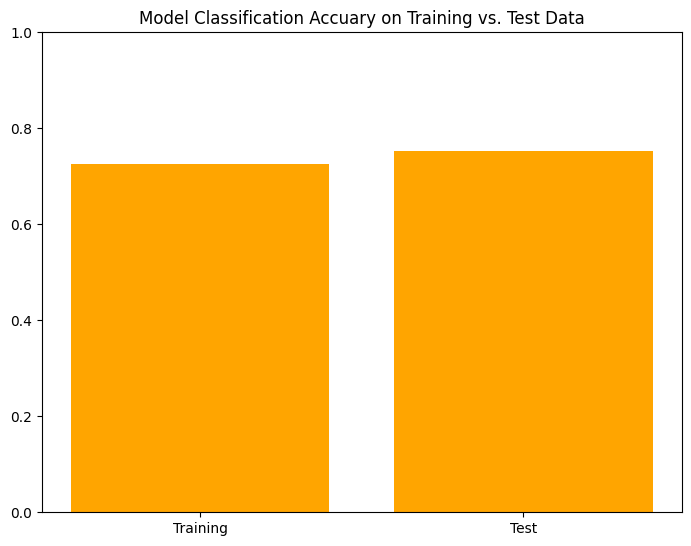

In [14]:
#Calculates the accuracy for the training and testing data and prints and plots them
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [15]:
#Creates the NB model and prints out the encoded training and testing data
NBmodel = GaussianNB()

X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

#The dataframe shuffled, stratified and is split into training and testing data (75-25 ratio)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=63, shuffle=True, test_size=0.25, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2331             1           1
1858             1           0
2325             1           1
2293             1           0
2025             1           0
...            ...         ...
171              1           0
305              0           1
987              0           1
60               1           0
860              0           0

[2508 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2681             0           0
3063             0           1
2731             0           0
15               1           0
579              0           0
...            ...         ...
369              1           1
191              0           0
500              0           1
2690             0           0
647              0           1

[837 rows x 2 columns]


[0.7268740031897927, 0.7455197132616488]


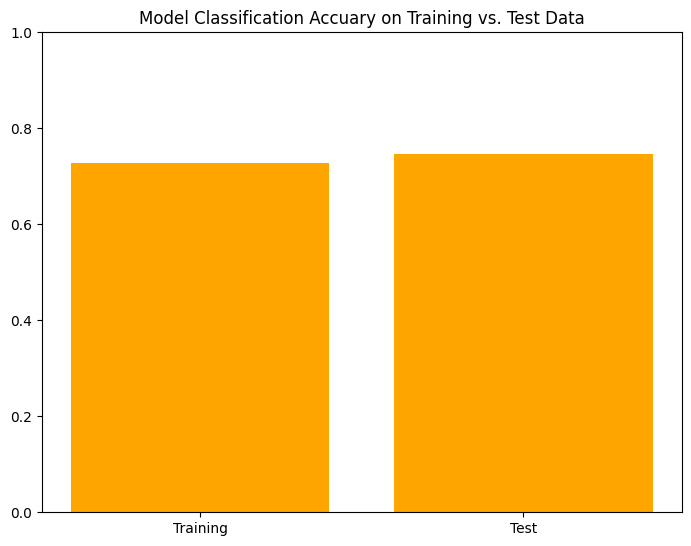

In [16]:
#Calculates the accuracy for the training and testing data and prints and plots them
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [17]:
#Creates the NB model and prints out the encoded training and testing data
NBmodel = GaussianNB()

X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

#The dataframe shuffled, stratified and is split into training and testing data (70-30 ratio)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=63, shuffle=True, test_size=0.3, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
692              1           0
713              1           1
412              1           1
1954             1           0
1268             1           0
...            ...         ...
171              1           0
305              0           1
552              1           0
60               1           0
598              0           1

[2341 rows x 2 columns]
      Alcohol_flag  Sugar_flag
209              0           1
297              0           0
3076             0           0
2477             0           1
1031             1           1
...            ...         ...
166              1           1
354              0           0
1868             1           1
2720             0           1
1937             1           0

[1004 rows x 2 columns]


[0.7283212302434857, 0.7390438247011952]


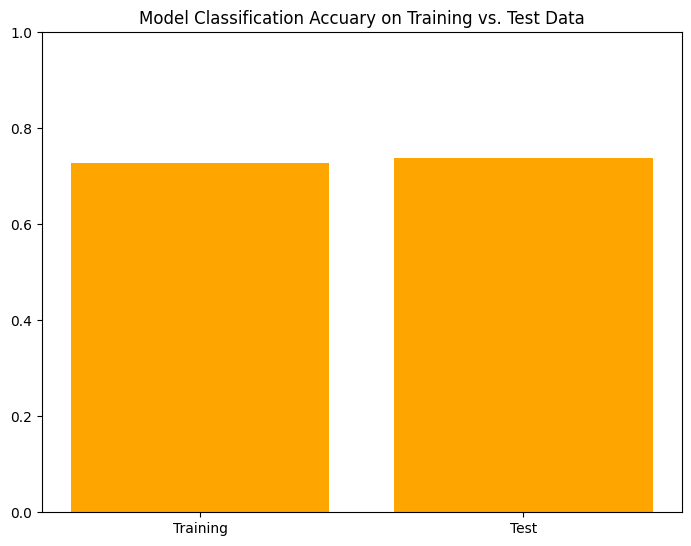

In [18]:
#Calculates the accuracy for the training and testing data and prints and plots them
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [19]:
#Creates the NB model and prints out the encoded training and testing data
NBmodel = GaussianNB()

X = encoded_wineDF.iloc[:,1:3]
y = encoded_wineDF.iloc[:,0]

#The dataframe shuffled, stratified and is split into training and testing data (60-40 ratio)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=63, shuffle=True, test_size=0.4, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
850              0           0
1472             0           1
317              0           1
2105             1           1
2537             0           0
...            ...         ...
44               0           1
3049             0           1
60               1           0
821              1           0
2008             1           1

[2007 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2477             0           1
1421             0           1
396              0           0
1097             1           1
220              1           1
...            ...         ...
2176             1           1
1693             1           1
982              1           0
1739             1           0
1915             1           0

[1338 rows x 2 columns]


[0.7259591429995017, 0.7399103139013453]


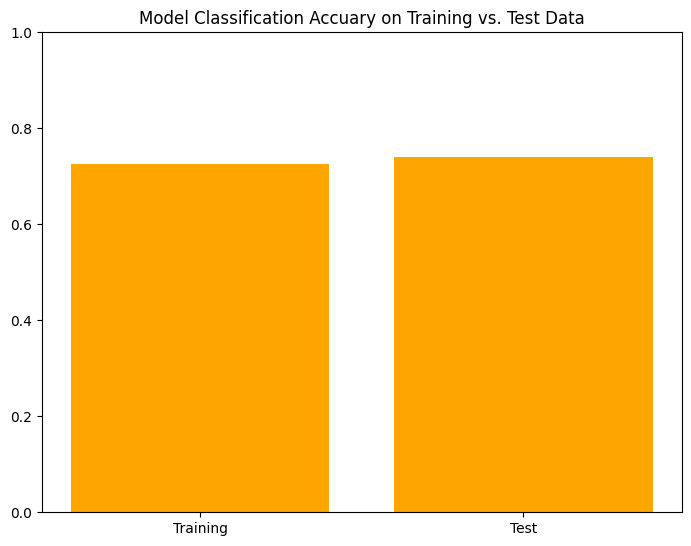

In [20]:
#Calculates the accuracy for the training and testing data and prints and plots them
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [21]:
#Creates the NB model and prints out the encoded training and testing data
NBmodel = GaussianNB()
X = encoded_wineDF.iloc[:, 1:3]
y = encoded_wineDF.iloc[:,0]

#The dataframe shuffled, stratified and is split into training and testing data (50-50 ratio)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=63, shuffle=True, test_size=0.5, stratify=y)

print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2938             0           0
1260             1           0
176              1           0
101              0           0
262              1           1
...            ...         ...
2979             0           0
44               0           1
2627             0           1
60               1           0
2028             1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
2116             1           0
2333             1           0
2901             0           1
870              0           0
2036             1           0
...            ...         ...
3342             0           1
581              0           0
615              1           0
738              1           1
509              0           0

[1673 rows x 2 columns]


[0.7248803827751196, 0.7381948595337716]


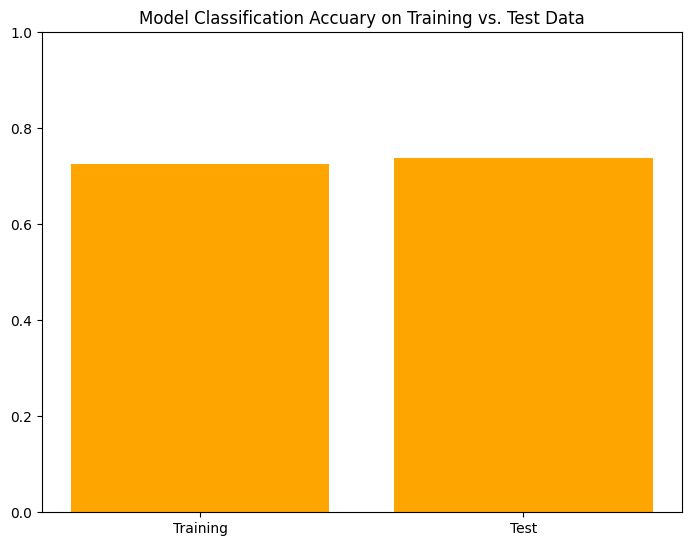

In [22]:
#Calculates the accuracy for the training and testing data and prints and plots them
NBmodel.fit(X_train, y_train)

labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]
print(scores)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

10. Summary: First I import and read the wine_flag_all.csv file. I then use it to create the dataframe wineDF and display it. After that I check for missing values and don't find any. Next I create a new dataframe encoded_wineDF and then loop through the orginal dataframe to add all of the label encoded data into the new dataframe. For type, 0 represents red wine while 1 represent white wine. For Alcohol_flag, 0 represents high alcohol content and 1 represents low alcohol content. Finally for Sugar_flag, 0 represent high sugar content while 1 represents low sugar content. My next step is create and plot the contigency tables for Type and Alcohol_flag and Type and Sugar_flag. I then analyze the results to the majority of the wine in this dataset is white (67.6%). While I couldn't make any additional conclusions with the Type and Alcohol content contigency table, for the Type and Sugar content contigency table I noticed that for red wine the majority of their sugar content is low (78.2%), while for white wine the majority of their sugar content is high (61.2%). Next I found all of the probablities for the different attributes using the data from the contigency table. These are the results:

  p(Red) = 1085/3345 = 0.324 = 32.4%

  p(White) = 2260/3345 = 0.676 = 67.6%

  p(Alcohol_High) = 1661/3345 = 0.497 = 49.7%

  p(Alcohol_Low) = 1684/3345 = 0.503 = 50.3%

  p(Sugar_High) = 1619/3345 = 0.484 = 48.4%

  p(Sugar_Low) = 1726/3345 = 0.516 = 51.6%

  I then found the conditional probablitites for Alcohol and SUgar content when the wine is red. These are the results I found using Bayes' Theorem:

  p(Alcohol_High|Red) = p(Red|Alcohol_High) * p(Alcohol_High) / p(Red) = (485/1661) * 0.497 / 0.324 = 0.447 = 44.7%

  p(Alcohol_Low|Red) = p(Red|Alcohol_Low) * p(Alcohol_Low) / p(Red) = (600/1684) * 0.503 / 0.324 = 0.553 = 55.3%

  p(Sugar_High|Red) = p(Red|Sugar_High) * p(Sugar_High) / p(Red) = (237/1619) * 0.484 / 0.324 = 0.218 = 21.8%

  p(Sugar_Low|Red) = p(Red|Sugar_Low) * p(Sugar_Low) / p(Red) = (848/1726) * 0.516 / 0.324 = 0.782 = 78.2%

  My final step is to make the NB model for the dataframe and calculate the accuracy of the training and testing data for different ratios of training to testing data. This is what I found:

  Ratio Train Test

  80-20 0.726 0.752

  75-25 0.727 0.746

  70-30 0.728 0.739

  60-40 0.726 0.740

  50-50 0.725 0.738

  Overall, based on my results, I found that changing the ratio of training to testing data didn't change the accuracy of either that much While the training data accuracy fluctuated by about .002 up and down, the training data accuracy goes down as the training data becomes smaller(goes down about 0.014).